In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/ML Assessment Dataset (Bank Data) - Sheet1.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
# Define the columns
binary_cols = {
    "default", 
    "housing",
    "loan",
    "y"
}

cat_cols = {
    "job",
    "marital",
    "education", # ordinal
    "contact",
    "month",
    "poutcome"
}

num_cols = {
    "age",
    "balance",
    "day",
    "duration",
    "campaign",
    "pdays",
    "previous"
}

In [5]:
# Convert the binary columns to 0 and 1
for col in binary_cols:
    df[col] = df[col].map({"yes": 1, "no": 0})

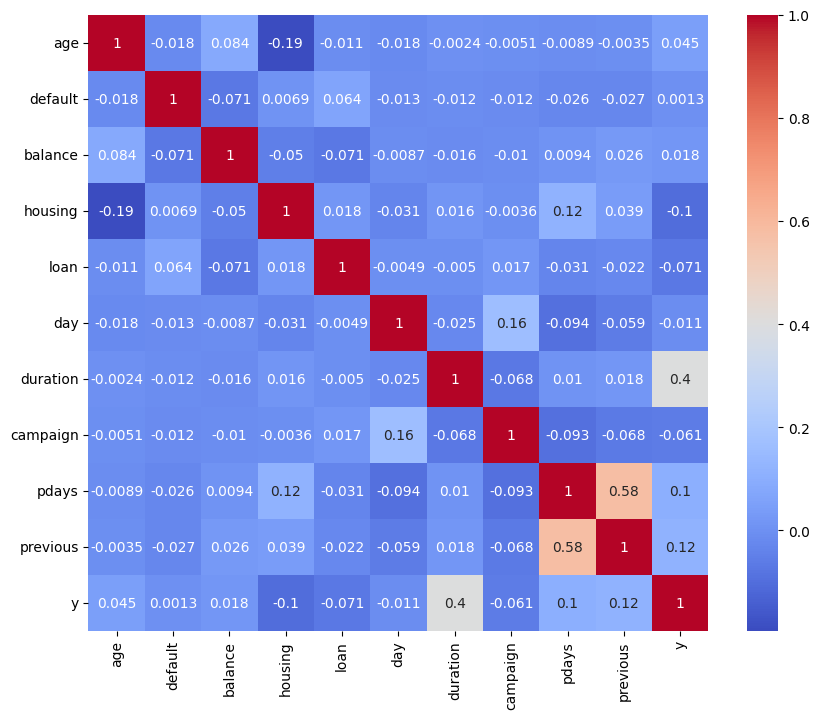

In [34]:
# create a new figure with a specified size
plt.figure(figsize=(10, 8))

# calculate the correlation matrix
corr = df.corr(numeric_only=True)

# create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap="coolwarm")

# show the plot
plt.show()

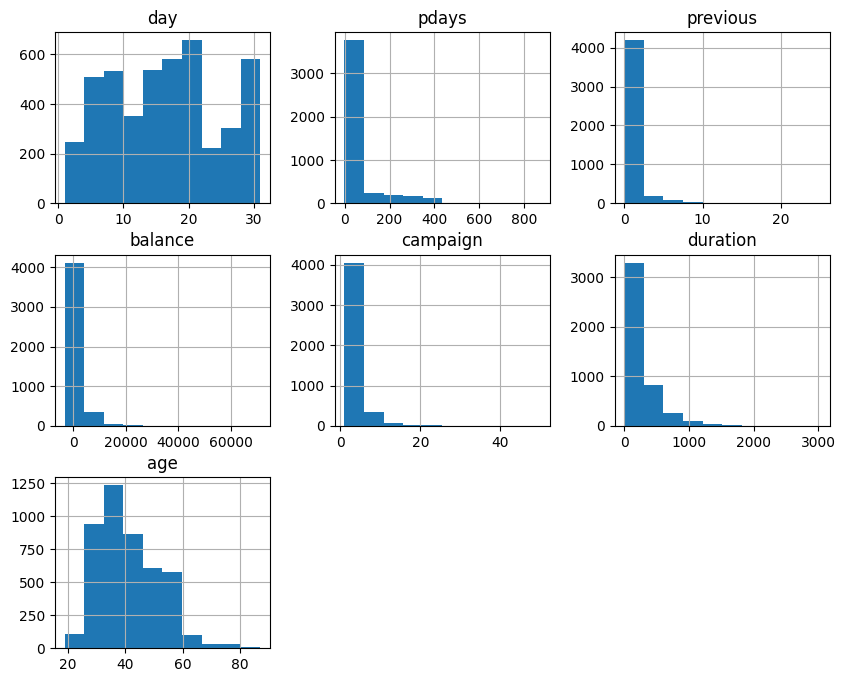

In [6]:
# Plot a histogram for the numerical columns
df[list(num_cols)].hist(bins=10, figsize=(10, 8))
plt.show()

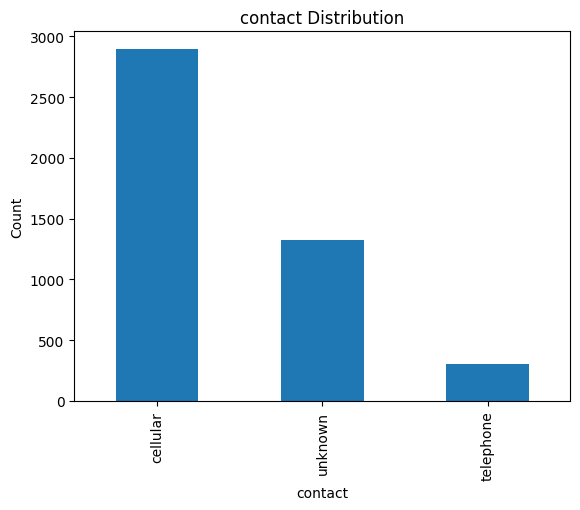

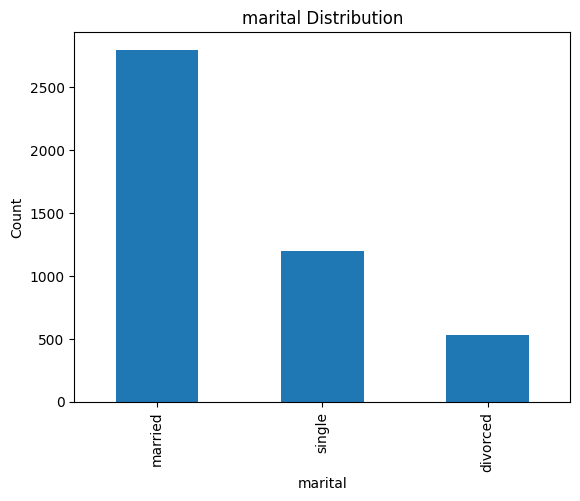

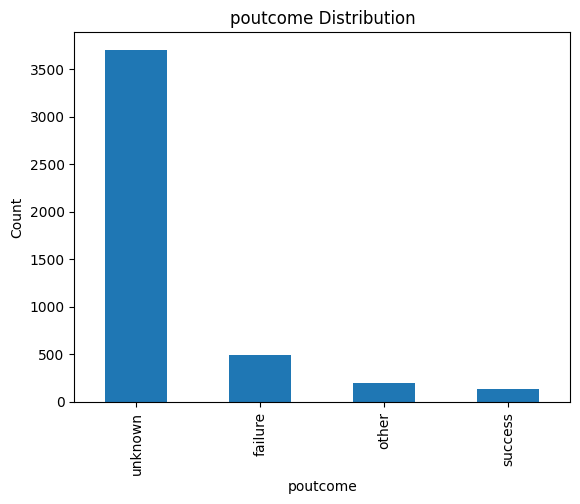

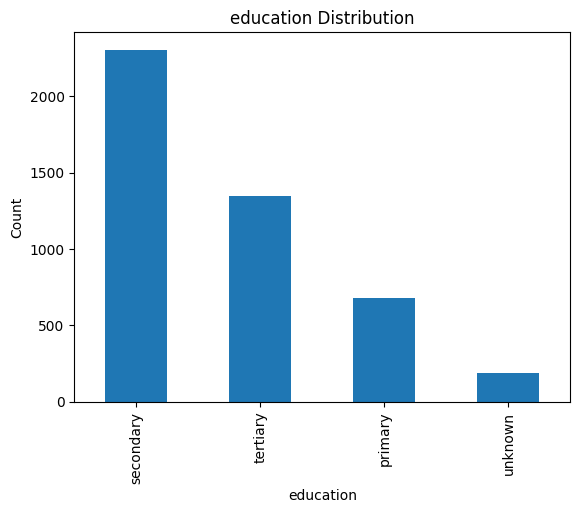

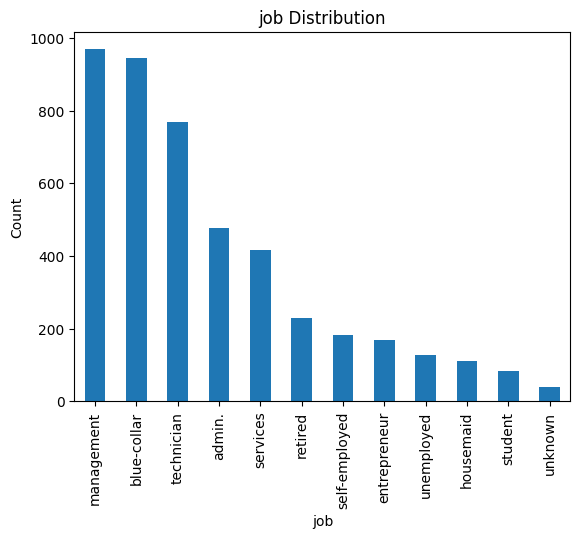

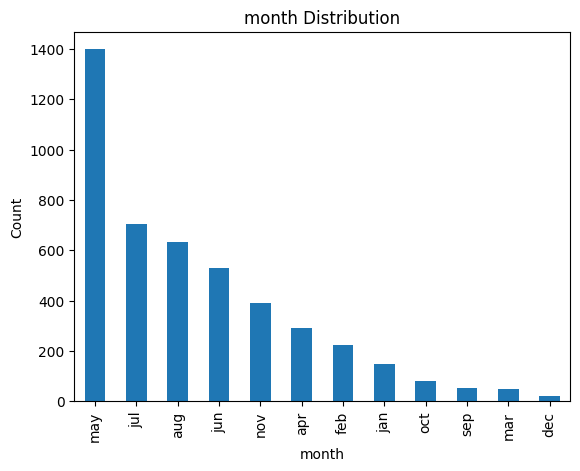

In [8]:
# Plot the number of records for the categorical columns
for col in cat_cols:
    df[col].value_counts().plot(kind="bar")
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

<AxesSubplot: >

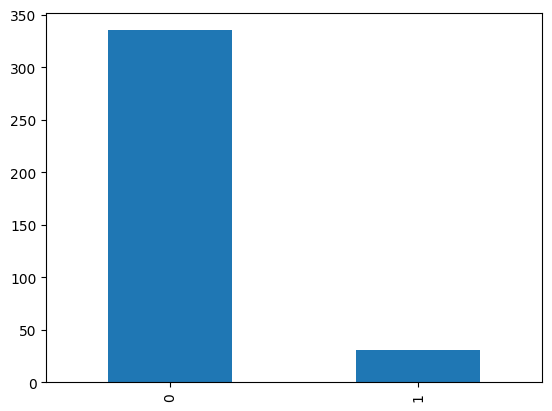

In [35]:
# Check the distribution of the target variable for customers with negative balance
df[df["balance"] < 0]["y"].value_counts().plot(kind="bar")

Bank balance can be negative if there are debts or overdrafts. In the data we have very few amount of people who have negative balance subscribed for long term deposit account

In [9]:
# Find out the number of term deposit subscribersby month
result = df.groupby("month")["y"].value_counts().unstack(fill_value=0)

# Rename the columns and reset the index
result = result.reset_index().rename(columns={0: "y_0", 1: "y_1"})

# Add a column for the total number of records
result["total"] = result["y_0"] + result["y_1"]

# Calculate the percentage of term deposit subscribers by month
result["y_1_percentage"] = round(result["y_1"] / result["total"] * 100, 2)

# Dsiplay the result
result.sort_values("total", ascending=False)

y,month,y_0,y_1,total,y_1_percentage
8,may,1305,93,1398,6.65
5,jul,645,61,706,8.64
1,aug,554,79,633,12.48
6,jun,476,55,531,10.36
9,nov,350,39,389,10.03
0,apr,237,56,293,19.11
3,feb,184,38,222,17.12
4,jan,132,16,148,10.81
10,oct,43,37,80,46.25
11,sep,35,17,52,32.69


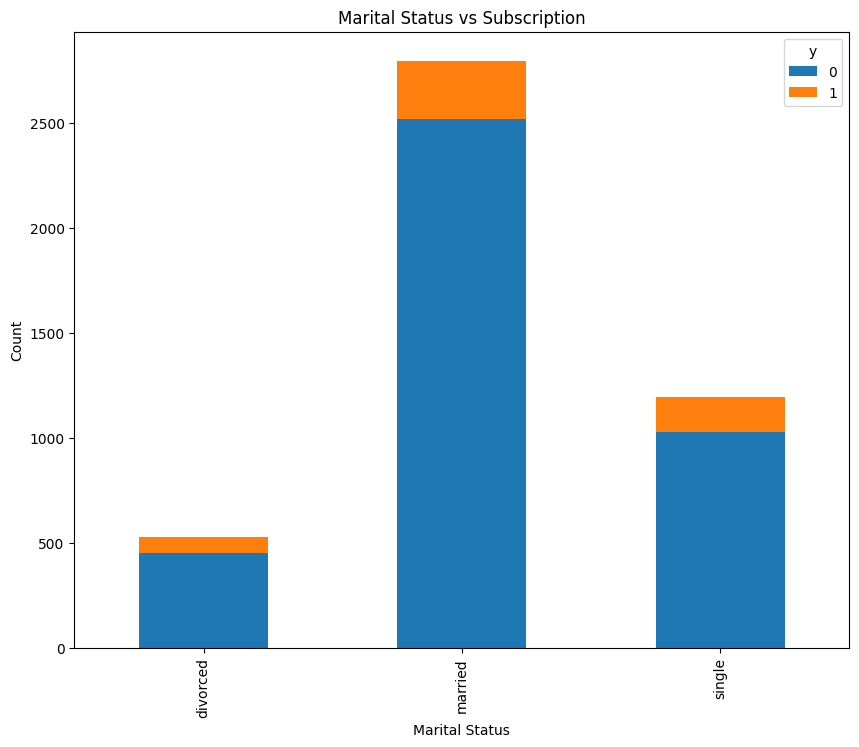

In [10]:
# Plot the correlation of Marital status with term deposit subscription
ct = pd.crosstab(df["marital"], df["y"])

# plot the stacked bar chart of the contingency table
ct.plot(kind="bar", stacked=True, figsize=(10, 8))
plt.title("Marital Status vs Subscription")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

In [11]:
# Calculate the percentage of term deposit subscribers by marital status
result = df.groupby("marital")["y"].mean()
result * 100

marital
divorced    14.583333
married      9.903468
single      13.963211
Name: y, dtype: float64

It Looks like the married people are less interested in long term deposits.

<AxesSubplot: xlabel='job'>

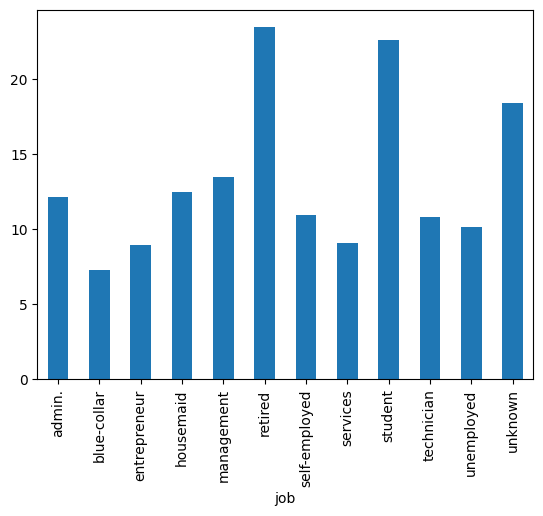

In [12]:
(df.groupby("job")["y"].mean() * 100).plot(kind="bar")

Students and Retired people are more interested in long term deposits. While Blue-collar and entepreneurs are less interested in long term deposits.

<AxesSubplot: xlabel='age'>

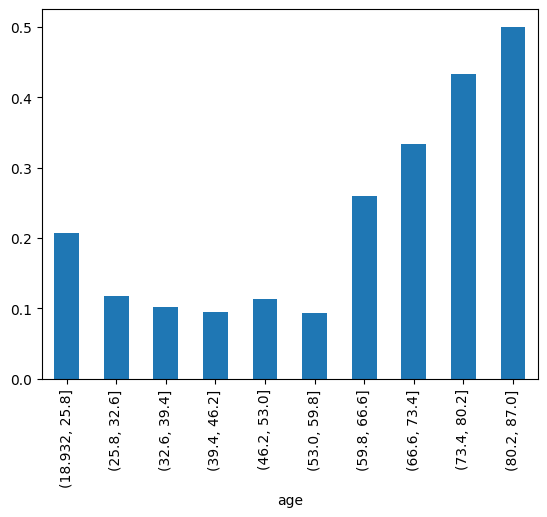

In [13]:
# Create 10 age groups using the cut method
age_groups = pd.cut(df["age"], bins=10)

# Plot the distribution of the age groups
df.groupby(age_groups)["y"].mean().plot(kind="bar")

This Further proves that people who are younger (more likely to be students) and who are in their old age are more interested in long term deposits

<AxesSubplot: xlabel='balance'>

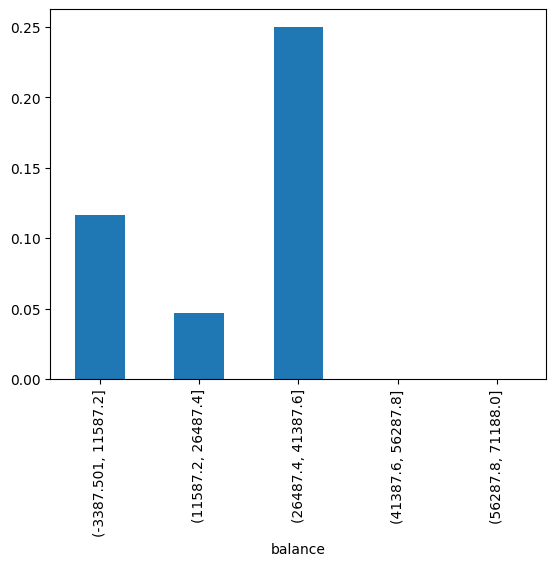

In [14]:
# Create 5 balance groups using the cut method
balance_groups = pd.cut(df["balance"], bins=5)

# Plot the distribution of the age groups
df.groupby(balance_groups)["y"].mean().plot(kind="bar")

It looks like people with high average early balance are not interested in long term deposits.

In [15]:
df.groupby("housing")["y"].mean() * 100

housing
0    15.341488
1     8.597108
Name: y, dtype: float64

In [16]:
df.groupby("loan")["y"].mean() * 100

loan
0    12.480418
1     6.222865
Name: y, dtype: float64

People with less liabilities are more interested in long term deposits, which makes sense as they are more focused on repaying their debts.

In [17]:
df.groupby("contact")["y"].mean() * 100

contact
cellular     14.364641
telephone    14.617940
unknown       4.607251
Name: y, dtype: float64

In [18]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


In [19]:
month_order = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
monthly_deposit_accounts = df.groupby("month")["y"].mean().reindex(month_order) * 100
monthly_total_records = df["month"].value_counts().reindex(month_order)
pd.concat([round(monthly_deposit_accounts, 2), monthly_total_records], axis=1)

,y,month
jan,10.81,148
feb,17.12,222
mar,42.86,49
apr,19.11,293
may,6.65,1398
jun,10.36,531
jul,8.64,706
aug,12.48,633
sep,32.69,52
oct,46.25,80


From the data, it looks like Months like March, October and December has the highest average number of successful subscription to long term deposits while months like November and May has the lowest.

This is further proven by the fact that there are surveys and records that show that people mostly create long term deposits during the end of the year.

Here are some specific examples:

- A 2022 article in the Financial Times reported that UK banks saw a 10% increase in long-term deposit subscriptions in December 2021.
- A 2023 article in the Wall Street Journal reported that US banks saw a 5% increase in long-term deposit subscriptions in December 2022.
- A 2023 survey by the Australian Securities and Investments Commission (ASIC) found that 45% of Australian investors said that they were more likely to invest in long-term deposits in December 2022.

There might be some reasons like:
- Year end bonuses
- Tax Planning
- Holiday Savings

Where as for the month of may there can be some reasons why people are not interested in long term deposits like:
- Spring Break
- Graduation Expenses
- Summer planning

<AxesSubplot: xlabel='duration'>

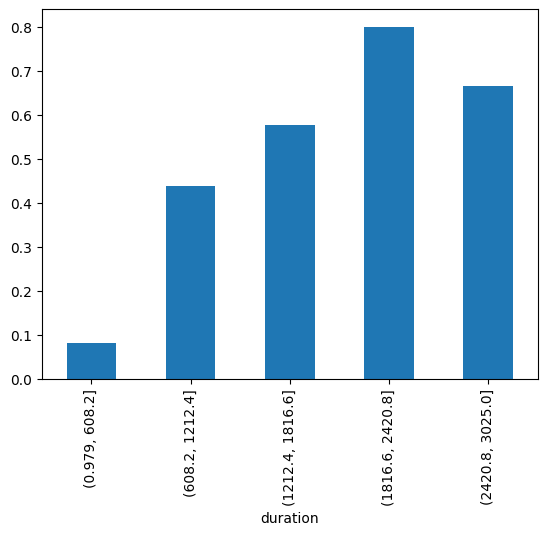

In [20]:
# Create 5 duration groups using the cut method
duration_groups = pd.cut(df["duration"], bins=5)

# Plot the distribution of the age groups
df.groupby(duration_groups)["y"].mean().plot(kind="bar")

It looks like as the duration of the call increases, there is a higher chance of the customer subscribing to long term deposits. But call that is too long might not be a good idea as it might annoy the customer. The ideal time seems to be 20-40 minutes, as it shows more that 50% chance of locking the customer. This duration is also has higher correlation with the positive outcome than other features.

In [21]:
# Define the bin size and create bins
bin_size = 10
bins = range(1, max(df['campaign']) + bin_size, bin_size)

# Create a new column 'bin' to represent the bin for each campaign
campaign_groups = pd.cut(df['campaign'], bins=bins, labels=range(1, len(bins)))

# Group by 'bin' and calculate the sum of 'y' for each bin
result = df.groupby(campaign_groups).agg({'y': 'sum'}).reset_index()

# Rename the columns
result.columns = ['bin_start', 'total_y']

# Conver the bin_start column to integer
result['bin_start'] = result['bin_start'].astype(int)

# Calculate the 'bin_end' column
result['bin_end'] = result['bin_start'] + bin_size - 1

# Fix the bin Range and get the final result
for i in range(1, len(result)):
    result.at[i, 'bin_start'] = result.at[i - 1, 'bin_end'] + 1

result

,bin_start,total_y,bin_end
0,1,276,10
1,11,4,11
2,12,1,12
3,13,0,13
4,14,0,14


Higher number of contacts during marketing campaings are not being helpful. It looks like the more number of contacts during marketing campaigns, the less likely the customer is going to subscribe to long term deposits. The ideal number of contacts look to be within the range of 10 and anything more than 20 seems to be not useful.

<AxesSubplot: title={'center': 'Not Contacted'}>

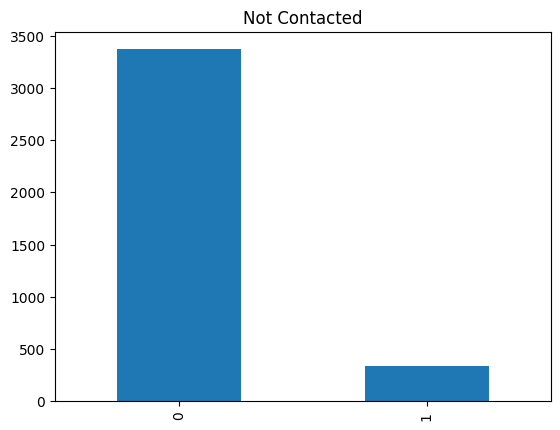

In [22]:
#  Find the number of subscribers based on whether they were previously contacted or not
df[(df['pdays'] == -1)]['y'].value_counts().plot(kind="bar", title="Not Contacted")

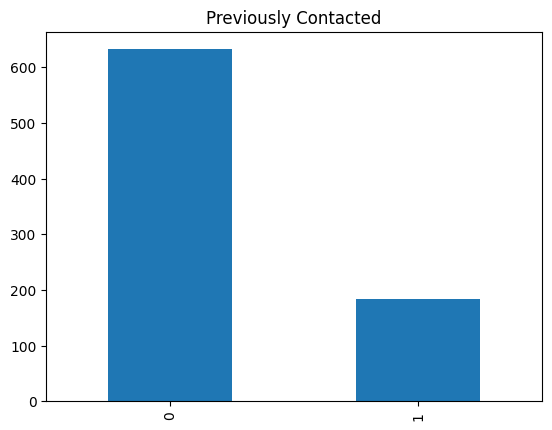

In [23]:
# Find the number of subscribers based on whether they were previously contacted or not

df[(df['pdays'] != -1)]['y'].value_counts().plot(kind="bar", title="Previously Contacted")
plt.show()

It looks like the new customers are less likely to subscribe to long term deposits. The ideal customers are the ones who have been contacted before.

,bin_start,total_y,total_records,bin_end
0,1,1,14,50
1,51,59,122,100
2,101,16,101,150
3,151,53,197,200
4,201,5,50,250
5,251,15,87,300
6,301,8,119,350
7,351,12,98,400
8,401,4,8,450
9,451,5,10,500


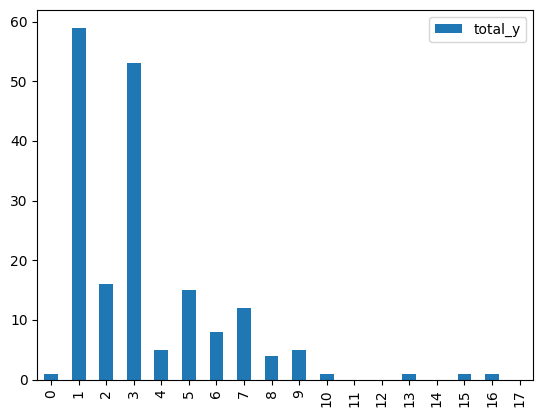

In [24]:
last_contacted = df[(df['pdays'] != -1)]
# Define the bin size and create bins
bin_size = 50
bins = range(1, max(last_contacted['pdays']) + bin_size, bin_size)

# Create a new column 'bin' to represent the bin for each campaign
contacted_groups = pd.cut(last_contacted['pdays'], bins=bins, labels=range(1, len(bins)))

# Group by 'bin' and calculate the sum of 'y' for each bin
result = last_contacted.groupby(contacted_groups).agg(value_sum=('y', 'sum'), row_count=('y', 'count')).reset_index()

# Rename the columns
result.columns = ['bin_start', 'total_y', 'total_records']

# Conver the bin_start column to integer
result['bin_start'] = result['bin_start'].astype(int)

# Calculate the 'bin_end' column
result['bin_end'] = result['bin_start'] + bin_size - 1

# Fix the bin Range and get the final result
for i in range(1, len(result)):
    result.at[i, 'bin_start'] = result.at[i - 1, 'bin_end'] + 1
    result.at[i, 'bin_end'] = result.at[i, 'bin_start'] + bin_size - 1

result[["total_y"]].plot(kind="bar")
result

The customers that were contacted within 1.5 months are less likely to subscribe to long term deposits. The ideal time seems to be 3-6 months.

,bin_start,total_y,total_records,bin_end
0,1,119,456,5
1,6,11,57,10
2,11,3,9,15
3,16,0,4,20
4,21,0,4,25


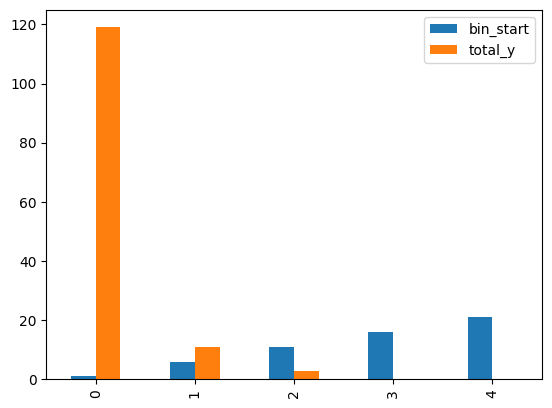

In [25]:
# Define the bin size and create bins
bin_size = 5
bins = range(1, max(last_contacted['previous']) + bin_size, bin_size)

# Create a new column 'bin' to represent the bin for each campaign
contacted_groups = pd.cut(last_contacted['previous'], bins=bins, labels=range(1, len(bins)))

# Group by 'bin' and calculate the sum of 'y' for each bin
result = last_contacted.groupby(contacted_groups).agg(value_sum=('y', 'sum'), row_count=('y', 'count')).reset_index()

# Rename the columns
result.columns = ['bin_start', 'total_y', 'total_records']

# Conver the bin_start column to integer
result['bin_start'] = result['bin_start'].astype(int)

# Calculate the 'bin_end' column
result['bin_end'] = result['bin_start'] + bin_size - 1

# Fix the bin Range and get the final result
for i in range(1, len(result)):
    result.at[i, 'bin_start'] = result.at[i - 1, 'bin_end'] + 1
    result.at[i, 'bin_end'] = result.at[i, 'bin_start'] + bin_size - 1
    

result[["bin_start", "total_y"]].plot(kind="bar")
result

In [26]:
df["pdays"].corr(df["previous"])

0.5775618266478835

the number of days since a client was last contacted is correlated with number of total contacts made with the client, which makes sense. We also saw the same in the above correlation plot.

In [27]:
df["poutcome"].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

poutcome
failure    12.857143
other      19.289340
success    64.341085
unknown     9.095816
Name: y, dtype: float64

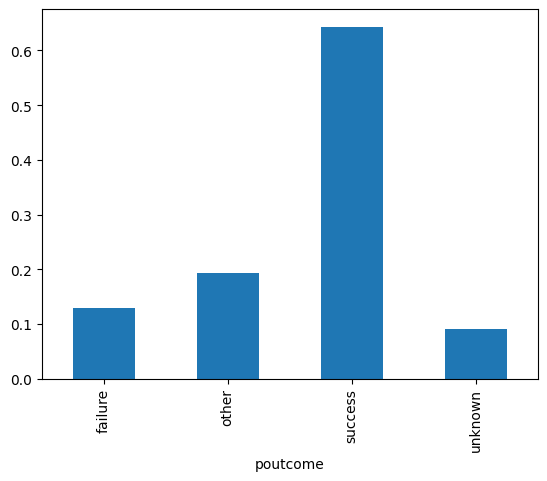

In [28]:
df.groupby('poutcome')['y'].mean().plot(kind="bar") 
df.groupby('poutcome')['y'].mean() * 100

successful campaigns has 64% of customers subscribing to long term deposits while unsuccessful campaigns has only around 13% of customers subscribing to long term deposits.